<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab</font></h1>
<hr>

# **Clusterização Hierárquica**

# Recordando a Teoria

Reveja aqui o processo complete o Clusterização Hierárquica.

```
# Define os dados do modelo
X = df[...]

# Normalização e outras preparações dos dados 
from sklearn.preprocessing import normalize 
X = normalize(X)

# Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(X, labels, metric='euclidean'))

# Faz a clusterização selecionada

## Declara o modelo
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

## 'Treina' o modelo
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

# Associando os dados
df['cluster'] = labels
print(df.head())
```

# Caso: **Airbnb NYC 2019** 

Neste data set você encontra dados do Airbnb de NYC de 2019. Explore os dados e em seguida faça uma clusterização dos imóveis com base nos atributos numérico e o tipo de apartamento (`room_type`).

https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv

# **IMPORTANTE** Para o questionário

Em sala empregaremos a versão reduzida do arquivo. Para responder o questionário empregue a versão estendida (sem o `_TIC` no final).

https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019.csv



# Exercício. Acesse e Explore os dados

In [ ]:
# Seu Código



# Exercício. Verifique a presença de Nulos

Verifique se existem dados nulos e, em caso positivos, opte por eliminar esses casos.

DICA: `isna()`, `dropna()`

In [ ]:
# Seu Código


# Exercício. Faça o Hot Encode de `room_type`

Verifique os valores de `room_type` e faça o *Hot Encode* do atributos. Você pode querer mudar o nome dos atributos ao final. Para isso empregue o `rename`.

DICAS:
```
# Hot encode
dummies = pd.get_dummies(df.<atributo>,prefix='<prefix>')
df = pd.concat([df, dummies],axis=1)

# Rename Columns
df.rename(columns={'antes1':'depois1', 'antes2':'depois'},inplace=True)
```

In [ ]:
# Seu Código


# Exercício. Defina a entrada `X`

Defina a entrada `X` somente com os atributos de interesse (valores numéricos e o *hot encode* de `room_type`).

In [ ]:
# Seu Código


# Exercício. Normalize os dados 

Vamos empregar o `normalize`. 

In [ ]:
# Seu Código


# Exercício. Selecione o número de Clusters

Empregue a Clusterização Hierárquica Aglomerativa, com distência Euclidiana e `linkage='ward'`. Você vai então verificar a métrica `Siclhouette`.




In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Seu Código


# Exercício. Clusterize os dados para o número de Clusters Selecionado

Exiba os rótulos (labels) gerados. Adicione então os labels ao dataframe original em uma nova coluna `cluster`.

In [ ]:
from sklearn.cluster import AgglomerativeClustering



# Exercício. Exiba o Dendograma (**RESOLVIDO**)

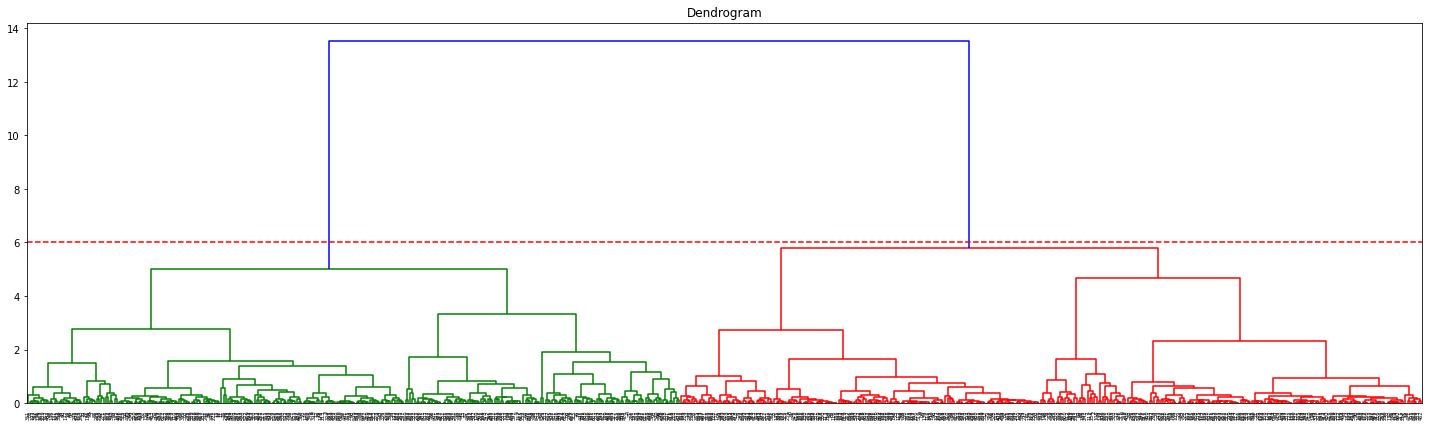

In [ ]:
# Seu código
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))  
plt.title("Dendrogram")
plt.xticks(rotation=90)  

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


# Exercício. Caracterizando os grupos (**RESOLVIDO**)

Verificando os valores médios de cada grupo.

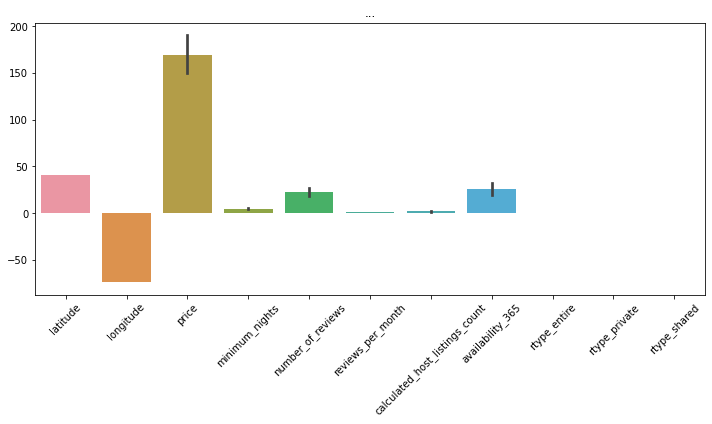

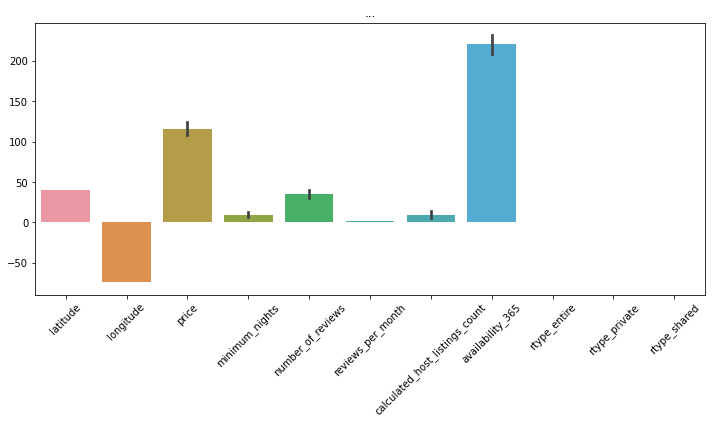

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared',
        'cluster']]

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()